In [120]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16


from sympy import init_printing
init_printing()

from sympy.utilities.lambdify import lambdify

##parametres

T = 180
Vm = 1360/36
L = 11000
rhoM = 0.25
nx = 51
dt = 3.6
dx = L/nx
nt = round(T/dt)

In [121]:
##initial conditions
##x = numpy.linspace(0,L,nx)
##rho = numpy.ones(nx)*0.01
##rho[10:20] = 0.05


x = numpy.linspace(0,L,nx)
rho = numpy.ones(nx)*0.02 ##note this change
rho[10:20] = 0.05

In [122]:
for n in range(1, nt):  
    un = rho.copy() 
    rho[1:] = un[1:]-(1-2*un[1:]/rhoM)*dt/dx*Vm*(un[1:]-un[0:-1]) 
    ##rho[0] = 0.01
    rho[0] = 0.02
   ## V[0:] = Vm(1-rho[0:]/rhoM)

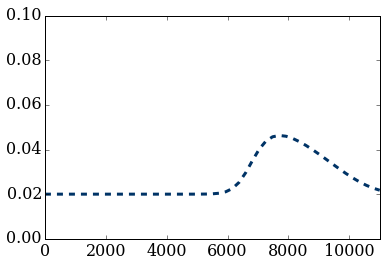

In [123]:
pyplot.plot(x, rho, color='#003366', ls='--', lw=3)
pyplot.ylim(0,0.1);
pyplot.xlim(0,11000);

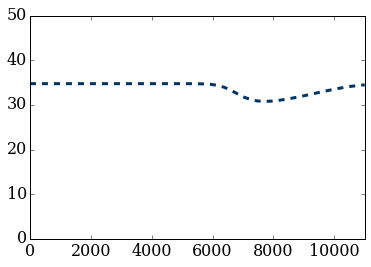

In [124]:
V = numpy.ones(nx)*Vm*(1-rho/rhoM)
pyplot.plot(x, V, color='#003366', ls='--', lw=3)
pyplot.ylim(0,50);
pyplot.xlim(0,11000);

In [125]:
print(V)

[ 34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555555  34.75555553  34.75555534  34.75555418  34.75554797
  34.75551856  34.75539424  34.75492077  34.7532834   34.74810644
  34.73306103  34.69277692  34.59383564  34.37476512  33.95361508
  33.28909289  32.47345858  31.71191667  31.16635807  30.8711827
  30.78050636  30.83377651  30.98389125  31.19973809  31.46125531
  31.75467768  32.06948268  32.39668308  32.72791052  33.05492992
  33.36942886  33.66306566  33.92783159  34.15677577  34.34502932
  34.49085633]


In [126]:
def summas(a):
    s = 0
    for x in a:
        s += x
    return s

# функция вычисления среднего арафиметического
def average(a):
    # используем определенную выше
    # функцию суммирования элементов массива
    return summas(a)/len(a)


In [127]:
print(average(V))

33.7638083717


In [128]:
print(min(V))

30.7805063633
